In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split
!pip install seaborn

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

C:\Anaconda\envs\tf113py36\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\envs\tf113py36\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\envs\tf113py36\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\envs\tf113py36\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarnin

In [3]:
import sqlite3  

file = open('Safe_Agro_Data_S10_14_August.db')   ##open the file 
conn = sqlite3.connect('Safe_Agro_Data_S10_14_August.db')  ## create the cursor pointing to the table
data_df = pd.read_sql_query('SELECT * FROM SENSOR_TABLE', conn) #create pandas dataframe so we can manipulate
#data_df.insert(0, 'unit', range(1, 1+len(data_df))) # add unit column
data_df.insert(0, 'unit', range(1, 1+len(data_df)))
data_df.head() # first 5 data

,unit,TIME,ACCEL_X,ACCEL_Y,ACCEL_Z,GYRO_X,GYRO_Y,GYRO_Z,CURRENT_SPEED,ACTIVITY
0,1,06:45:33,0.213084,9.924265,-2.166753,-0.008934,-0.018097,-0.017104,0.0,Right
1,2,06:45:33,0.213084,9.924265,-2.166753,-0.008934,-0.018097,-0.017104,0.0,Right
2,3,06:45:33,0.213084,9.924265,-2.166753,-0.008934,-0.018097,-0.017104,0.0,Right
3,4,06:45:33,0.560243,8.806173,-2.741361,-0.008934,-0.018097,-0.017104,0.0,Right
4,5,06:45:33,0.193930,9.344869,-1.414973,0.036270,-0.001604,-0.024435,0.0,Right


In [4]:
data_df["ACTIVITY"].value_counts()

Brake                    18631
Left                     18626
Right                    18157
Aggressive Left          14511
Accelerate               14036
Aggressive Right         13886
Aggressive Accelerate    10897
Aggressive Brake         10447
Idling                    9321
Name: ACTIVITY, dtype: int64

### Visualizing Graphs

In [5]:
TIME_STAMP = 2500

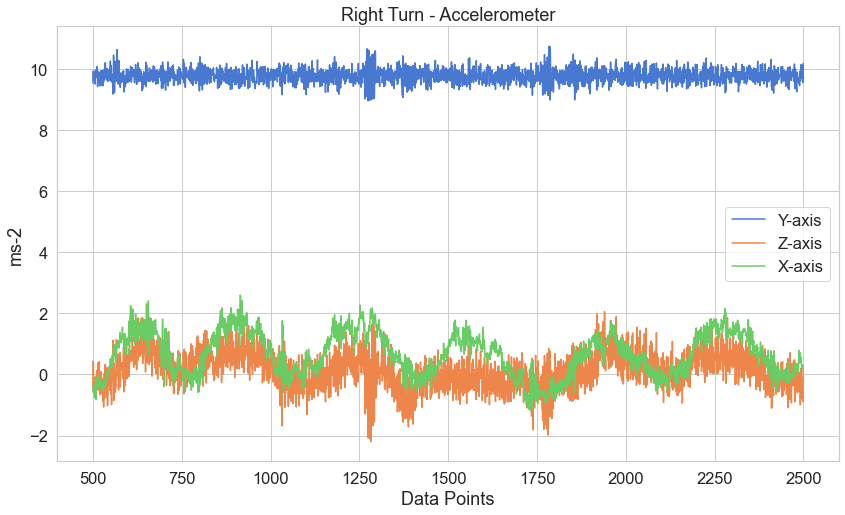

In [6]:
# ACCELEROMETER RIGHT TURN 

plt.plot(np.arange(500,TIME_STAMP), data_df.ACCEL_Y[data_df['ACTIVITY']=="Right"][500:TIME_STAMP],  label = 'Y-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.ACCEL_Z[data_df['ACTIVITY']=="Right"][500:TIME_STAMP],  label = 'Z-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.ACCEL_X[data_df['ACTIVITY']=="Right"][500:TIME_STAMP],  label = 'X-axis' )
plt.title("Right Turn - Accelerometer")
plt.xlabel("Data Points")
plt.ylabel("ms-2")
plt.legend()

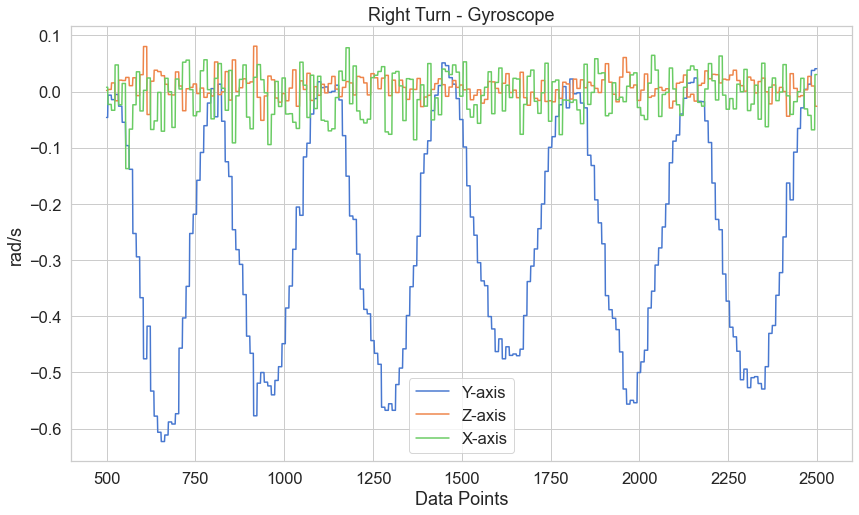

In [7]:
# GYROSCOPE RIGHT TURN 


plt.plot(np.arange(500,TIME_STAMP), data_df.GYRO_Y[data_df['ACTIVITY']=="Right"][500:TIME_STAMP],  label = 'Y-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.GYRO_Z[data_df['ACTIVITY']=="Right"][500:TIME_STAMP],  label = 'Z-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.GYRO_X[data_df['ACTIVITY']=="Right"][500:TIME_STAMP],  label = 'X-axis' )
plt.title("Right Turn - Gyroscope")
plt.xlabel("Data Points")
plt.ylabel("rad/s")
plt.legend()

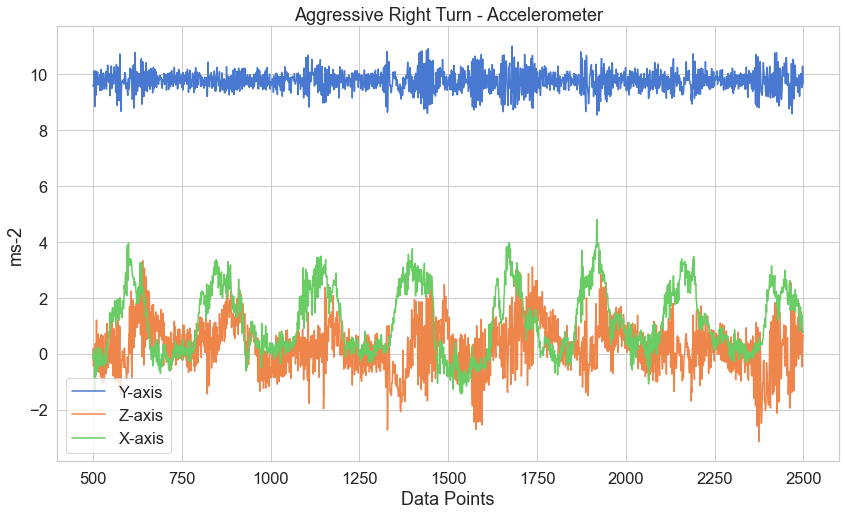

In [8]:
# ACCELEROMETER AGGRESSIVE RIGHT TURN 


plt.plot(np.arange(500,TIME_STAMP), data_df.ACCEL_Y[data_df['ACTIVITY']=="Aggressive Right"][500:TIME_STAMP],  label = 'Y-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.ACCEL_Z[data_df['ACTIVITY']=="Aggressive Right"][500:TIME_STAMP],  label = 'Z-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.ACCEL_X[data_df['ACTIVITY']=="Aggressive Right"][500:TIME_STAMP],  label = 'X-axis' )
plt.title("Aggressive Right Turn - Accelerometer")
plt.xlabel("Data Points")
plt.ylabel("ms-2")
plt.legend()

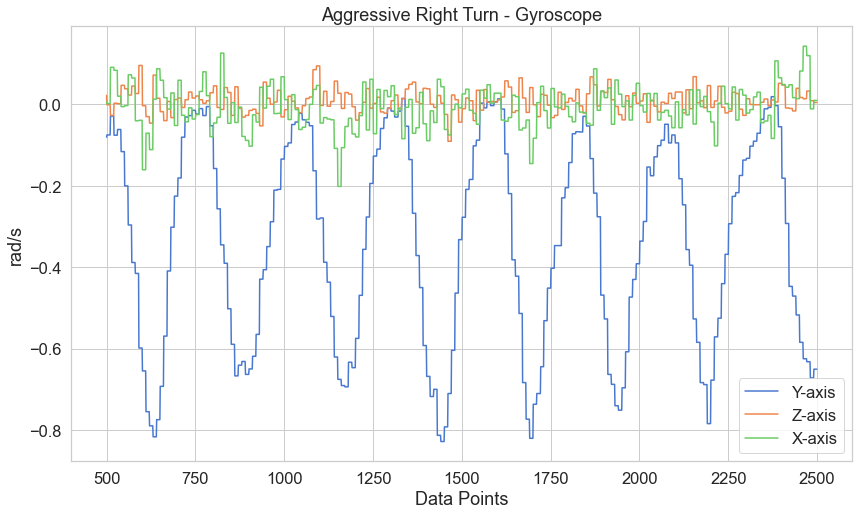

In [9]:
# GYROSCOPE AGGRESSIVE RIGHT TURN 


plt.plot(np.arange(500,TIME_STAMP), data_df.GYRO_Y[data_df['ACTIVITY']=="Aggressive Right"][500:TIME_STAMP],  label = 'Y-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.GYRO_Z[data_df['ACTIVITY']=="Aggressive Right"][500:TIME_STAMP],  label = 'Z-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.GYRO_X[data_df['ACTIVITY']=="Aggressive Right"][500:TIME_STAMP],  label = 'X-axis' )
plt.title("Aggressive Right Turn - Gyroscope")
plt.xlabel("Data Points")
plt.ylabel("rad/s")
plt.legend()

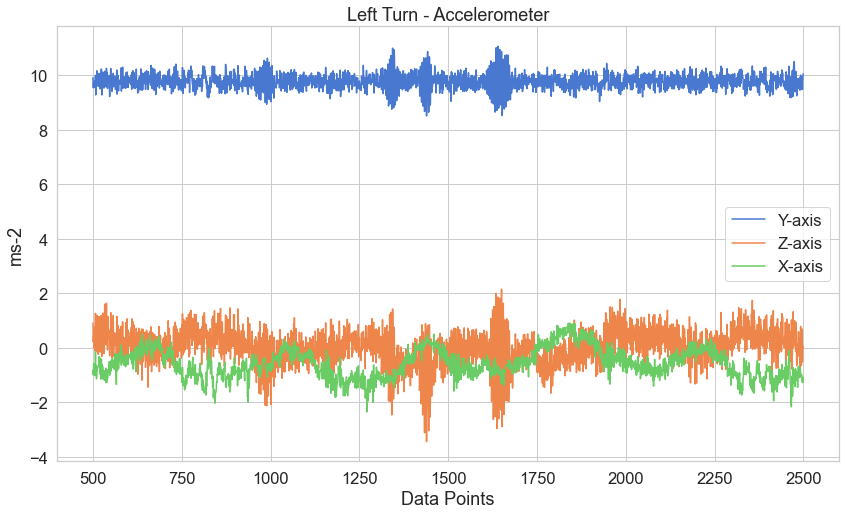

In [10]:
# ACCELEROMETER LEFT TURN 


plt.plot(np.arange(500,TIME_STAMP), data_df.ACCEL_Y[data_df['ACTIVITY']=="Left"][500:TIME_STAMP],  label = 'Y-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.ACCEL_Z[data_df['ACTIVITY']=="Left"][500:TIME_STAMP],  label = 'Z-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.ACCEL_X[data_df['ACTIVITY']=="Left"][500:TIME_STAMP],  label = 'X-axis' )
plt.title("Left Turn - Accelerometer")
plt.xlabel("Data Points")
plt.ylabel("ms-2")
plt.legend()

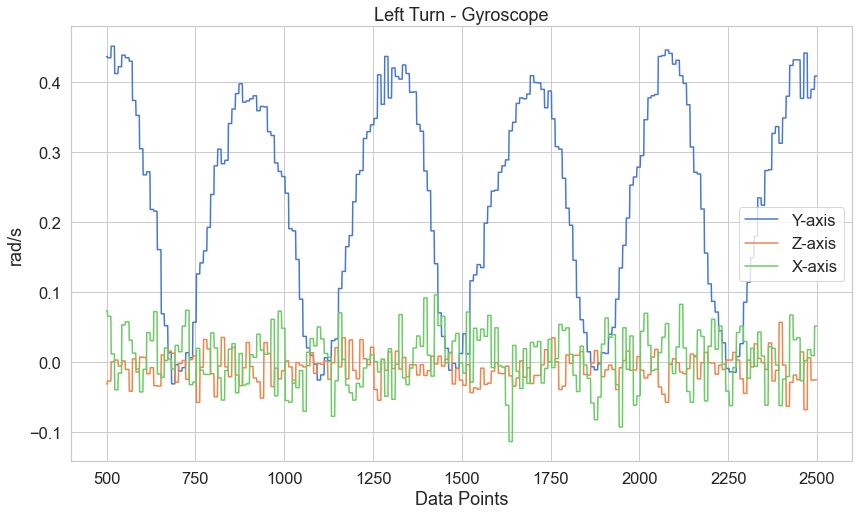

In [11]:
# GYROSCOPE LEFT TURN 


plt.plot(np.arange(500,TIME_STAMP), data_df.GYRO_Y[data_df['ACTIVITY']=="Left"][500:TIME_STAMP],  label = 'Y-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.GYRO_Z[data_df['ACTIVITY']=="Left"][500:TIME_STAMP],  label = 'Z-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.GYRO_X[data_df['ACTIVITY']=="Left"][500:TIME_STAMP],  label = 'X-axis' )
plt.title("Left Turn - Gyroscope")
plt.xlabel("Data Points")
plt.ylabel("rad/s")
plt.legend()

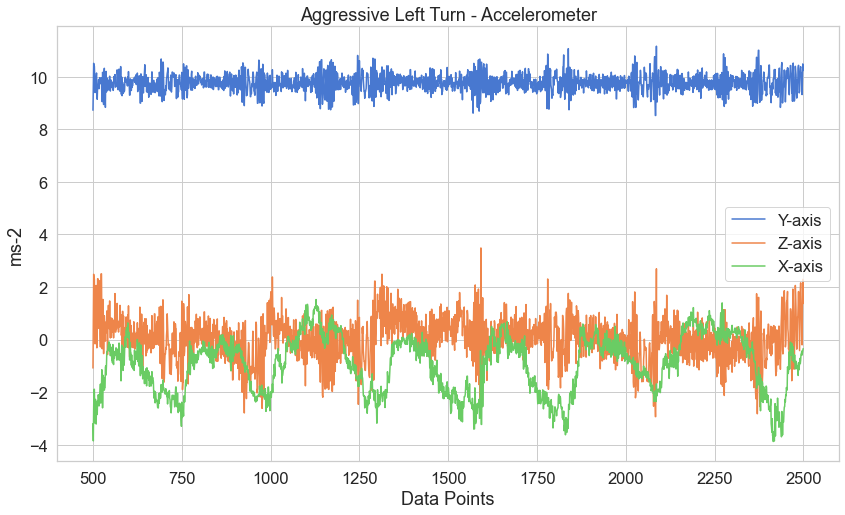

In [12]:
# ACCELEROMETER AGGRESSIVE LEFT TURN 


plt.plot(np.arange(500,TIME_STAMP), data_df.ACCEL_Y[data_df['ACTIVITY']=="Aggressive Left"][500:TIME_STAMP],  label = 'Y-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.ACCEL_Z[data_df['ACTIVITY']=="Aggressive Left"][500:TIME_STAMP],  label = 'Z-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.ACCEL_X[data_df['ACTIVITY']=="Aggressive Left"][500:TIME_STAMP],  label = 'X-axis' )
plt.title("Aggressive Left Turn - Accelerometer")
plt.xlabel("Data Points")
plt.ylabel("ms-2")
plt.legend()

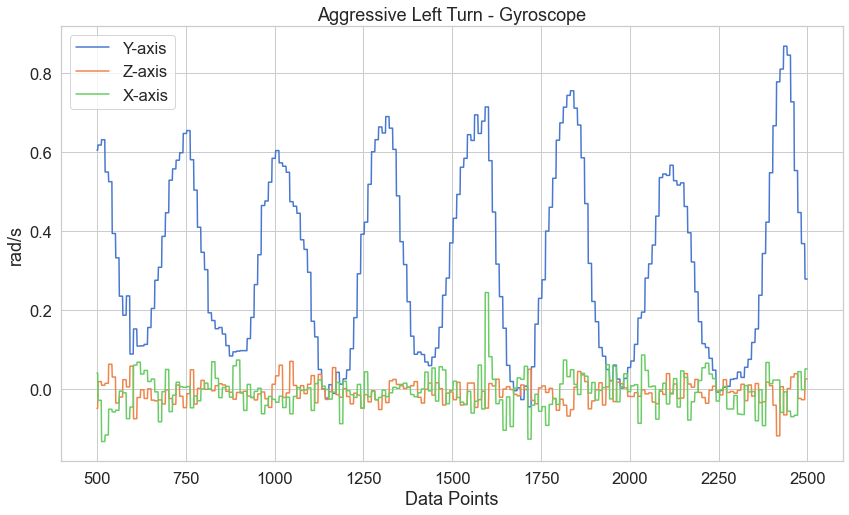

In [13]:
# GYROSCOPE AGGRESSIVE LEFT TURN 


plt.plot(np.arange(500,TIME_STAMP), data_df.GYRO_Y[data_df['ACTIVITY']=="Aggressive Left"][500:TIME_STAMP],  label = 'Y-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.GYRO_Z[data_df['ACTIVITY']=="Aggressive Left"][500:TIME_STAMP],  label = 'Z-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.GYRO_X[data_df['ACTIVITY']=="Aggressive Left"][500:TIME_STAMP],  label = 'X-axis' )
plt.title("Aggressive Left Turn - Gyroscope")
plt.xlabel("Data Points")
plt.ylabel("rad/s")
plt.legend()

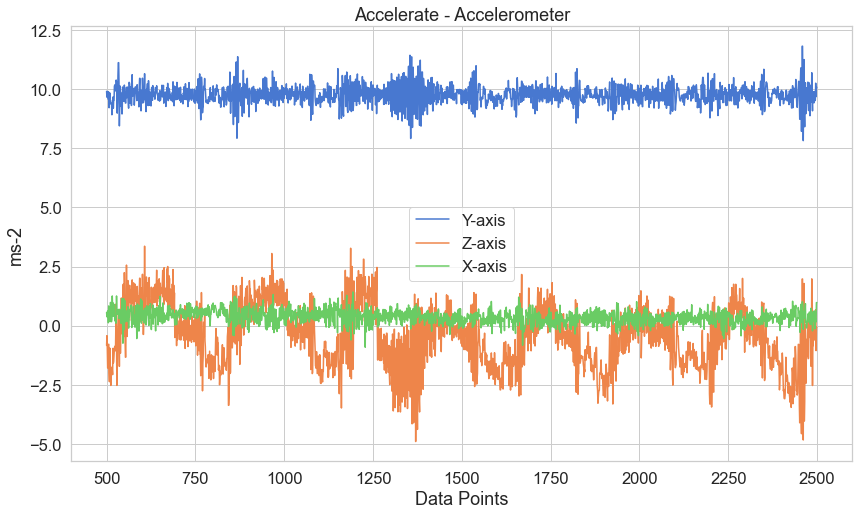

In [14]:
# ACCELEROMETER ACCELERATE

plt.plot(np.arange(500,TIME_STAMP), data_df.ACCEL_Y[data_df['ACTIVITY']=="Accelerate"][500:TIME_STAMP],  label = 'Y-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.ACCEL_Z[data_df['ACTIVITY']=="Accelerate"][500:TIME_STAMP],  label = 'Z-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.ACCEL_X[data_df['ACTIVITY']=="Accelerate"][500:TIME_STAMP],  label = 'X-axis' )
plt.title("Accelerate - Accelerometer")
plt.xlabel("Data Points")
plt.ylabel("ms-2")
plt.legend()


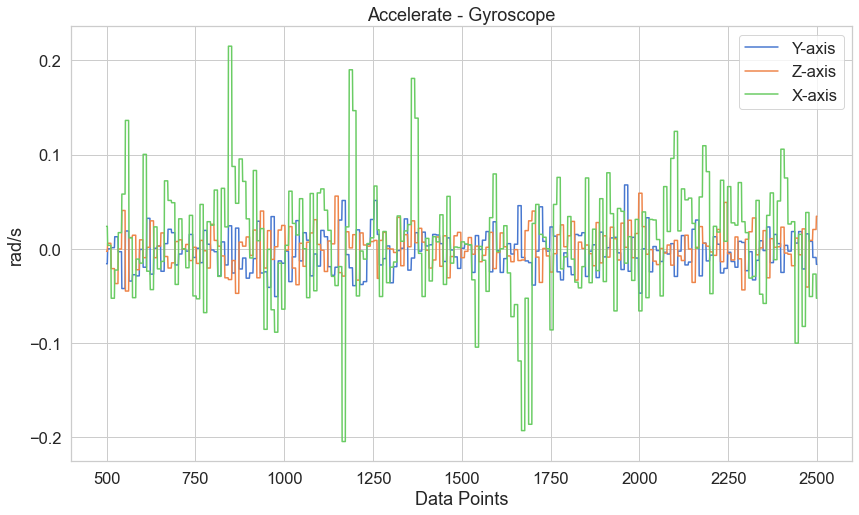

In [15]:
# GYROSCOPE ACCELERATE 


plt.plot(np.arange(500,TIME_STAMP), data_df.GYRO_Y[data_df['ACTIVITY']=="Accelerate"][500:TIME_STAMP],  label = 'Y-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.GYRO_Z[data_df['ACTIVITY']=="Accelerate"][500:TIME_STAMP],  label = 'Z-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.GYRO_X[data_df['ACTIVITY']=="Accelerate"][500:TIME_STAMP],  label = 'X-axis' )
plt.title("Accelerate - Gyroscope")
plt.xlabel("Data Points")
plt.ylabel("rad/s")
plt.legend()

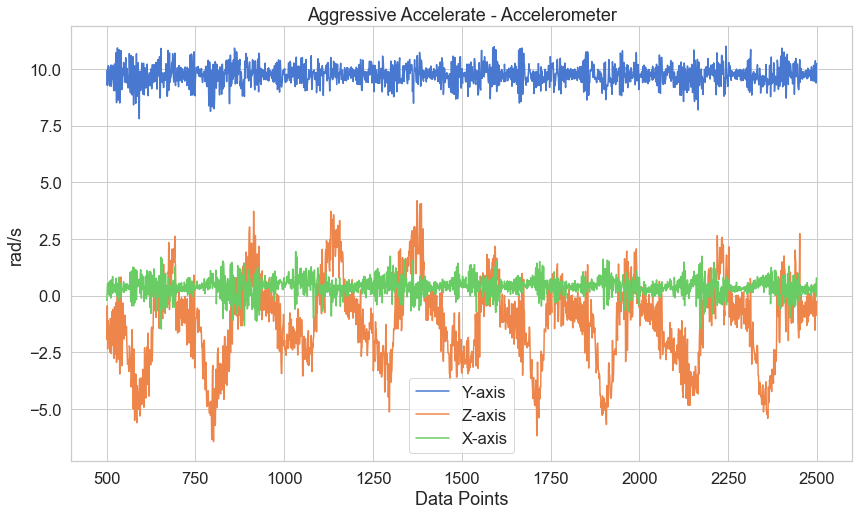

In [16]:
# ACCELEROMETER AGGRESSIVE ACCELERATE
plt.plot(np.arange(500,TIME_STAMP), data_df.ACCEL_Y[data_df['ACTIVITY']=="Aggressive Accelerate"][500:TIME_STAMP],  label = 'Y-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.ACCEL_Z[data_df['ACTIVITY']=="Aggressive Accelerate"][500:TIME_STAMP],  label = 'Z-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.ACCEL_X[data_df['ACTIVITY']=="Aggressive Accelerate"][500:TIME_STAMP],  label = 'X-axis' )
plt.title("Aggressive Accelerate - Accelerometer")
plt.xlabel("Data Points")
plt.ylabel("rad/s")
plt.legend()


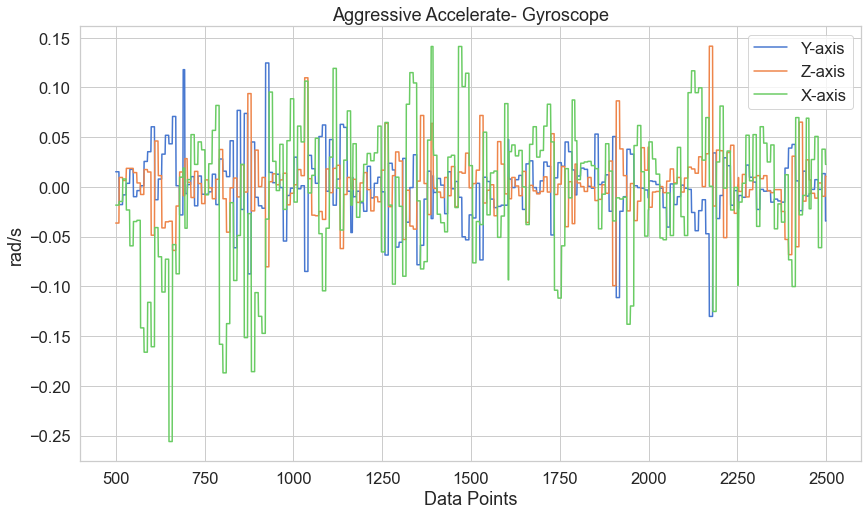

In [17]:
# GYROSCOPE AGGRESSIVE ACCELERATE 


plt.plot(np.arange(500,TIME_STAMP), data_df.GYRO_Y[data_df['ACTIVITY']=="Aggressive Accelerate"][500:TIME_STAMP],  label = 'Y-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.GYRO_Z[data_df['ACTIVITY']=="Aggressive Accelerate"][500:TIME_STAMP],  label = 'Z-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.GYRO_X[data_df['ACTIVITY']=="Aggressive Accelerate"][500:TIME_STAMP],  label = 'X-axis' )
plt.title("Aggressive Accelerate- Gyroscope")
plt.xlabel("Data Points")
plt.ylabel("rad/s")
plt.legend()

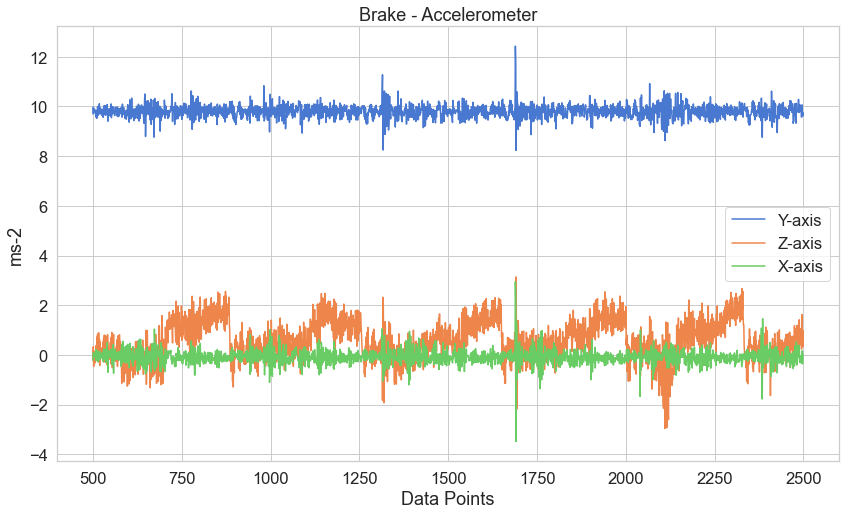

In [18]:
# ACCELEROMETER Brake
plt.plot(np.arange(500,TIME_STAMP), data_df.ACCEL_Y[data_df['ACTIVITY']=="Brake"][500:TIME_STAMP],  label = 'Y-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.ACCEL_Z[data_df['ACTIVITY']=="Brake"][500:TIME_STAMP],  label = 'Z-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.ACCEL_X[data_df['ACTIVITY']=="Brake"][500:TIME_STAMP],  label = 'X-axis' )
plt.title("Brake - Accelerometer")
plt.xlabel("Data Points")
plt.ylabel("ms-2")
plt.legend()


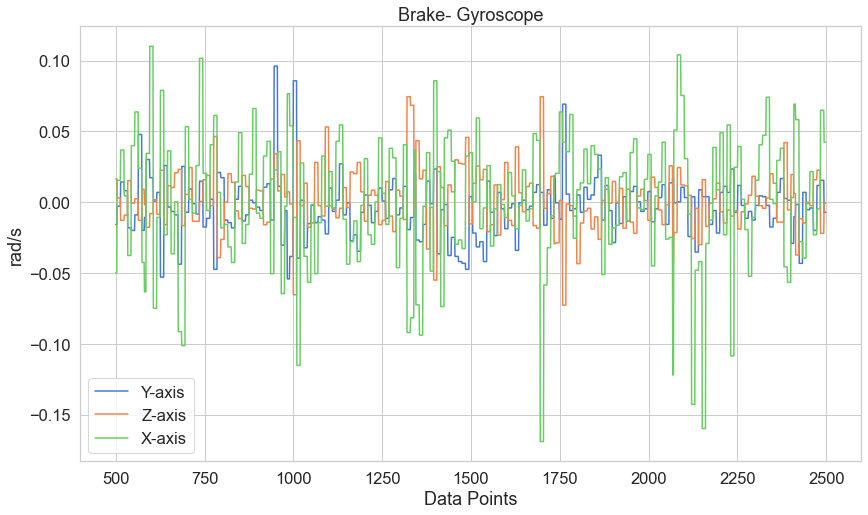

In [19]:
# GYROSCOPE Brake


plt.plot(np.arange(500,TIME_STAMP), data_df.GYRO_Y[data_df['ACTIVITY']=="Brake"][500:TIME_STAMP],  label = 'Y-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.GYRO_Z[data_df['ACTIVITY']=="Brake"][500:TIME_STAMP],  label = 'Z-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.GYRO_X[data_df['ACTIVITY']=="Brake"][500:TIME_STAMP],  label = 'X-axis' )
plt.title("Brake- Gyroscope")
plt.xlabel("Data Points")
plt.ylabel("rad/s")
plt.legend()

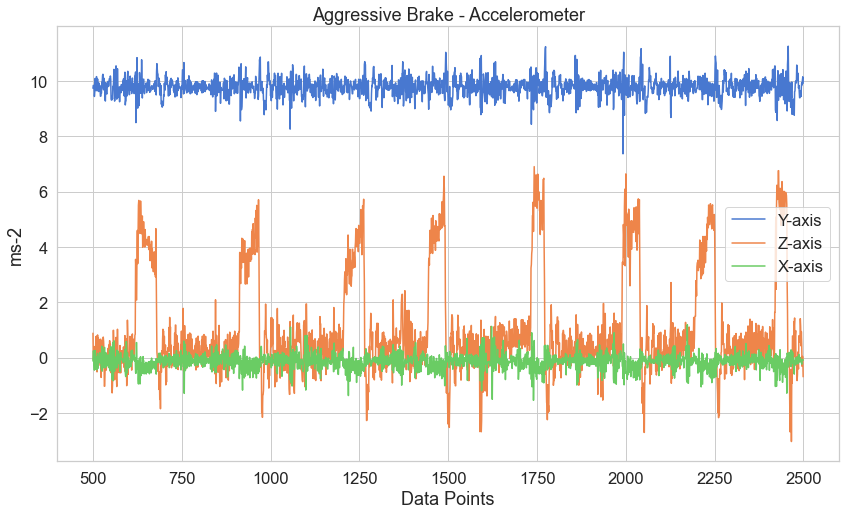

In [20]:
# ACCELEROMETER AGGRESSIVE Brake
plt.plot(np.arange(500,TIME_STAMP), data_df.ACCEL_Y[data_df['ACTIVITY']=="Aggressive Brake"][500:TIME_STAMP],  label = 'Y-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.ACCEL_Z[data_df['ACTIVITY']=="Aggressive Brake"][500:TIME_STAMP],  label = 'Z-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.ACCEL_X[data_df['ACTIVITY']=="Aggressive Brake"][500:TIME_STAMP],  label = 'X-axis' )
plt.title("Aggressive Brake - Accelerometer")
plt.xlabel("Data Points")
plt.ylabel("ms-2")
plt.legend()

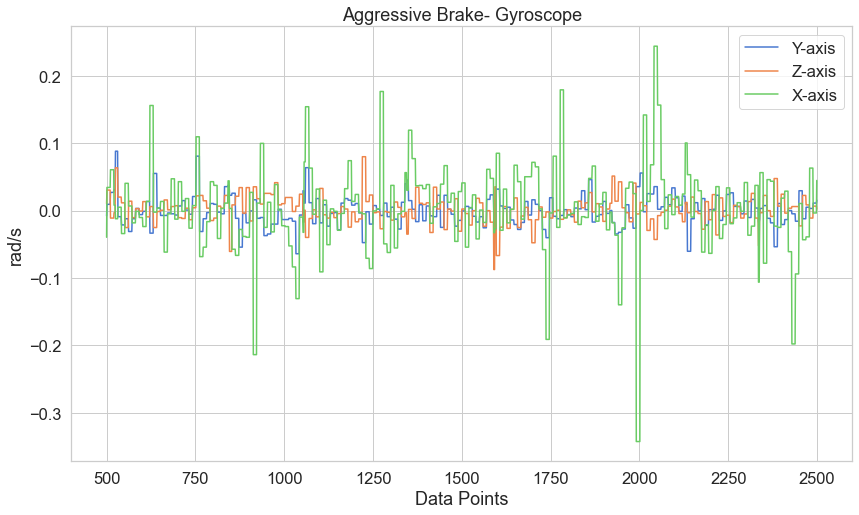

In [21]:
# GYROSCOPE AGGRESSIVE Brake


plt.plot(np.arange(500,TIME_STAMP), data_df.GYRO_Y[data_df['ACTIVITY']=="Aggressive Brake"][500:TIME_STAMP],  label = 'Y-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.GYRO_Z[data_df['ACTIVITY']=="Aggressive Brake"][500:TIME_STAMP],  label = 'Z-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.GYRO_X[data_df['ACTIVITY']=="Aggressive Brake"][500:TIME_STAMP],  label = 'X-axis' )
plt.title("Aggressive Brake- Gyroscope")
plt.xlabel("Data Points")
plt.ylabel("rad/s")
plt.legend()

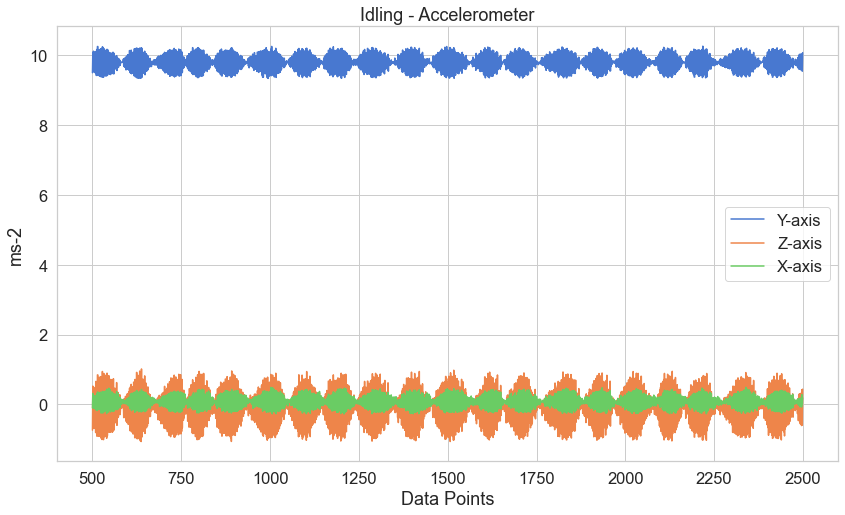

In [22]:
# ACCELEROMETER IDLING
plt.plot(np.arange(500,TIME_STAMP), data_df.ACCEL_Y[data_df['ACTIVITY']=="Idling"][500:TIME_STAMP],  label = 'Y-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.ACCEL_Z[data_df['ACTIVITY']=="Idling"][500:TIME_STAMP],  label = 'Z-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.ACCEL_X[data_df['ACTIVITY']=="Idling"][500:TIME_STAMP],  label = 'X-axis' )
plt.title("Idling - Accelerometer")
plt.xlabel("Data Points")
plt.ylabel("ms-2")
plt.legend()

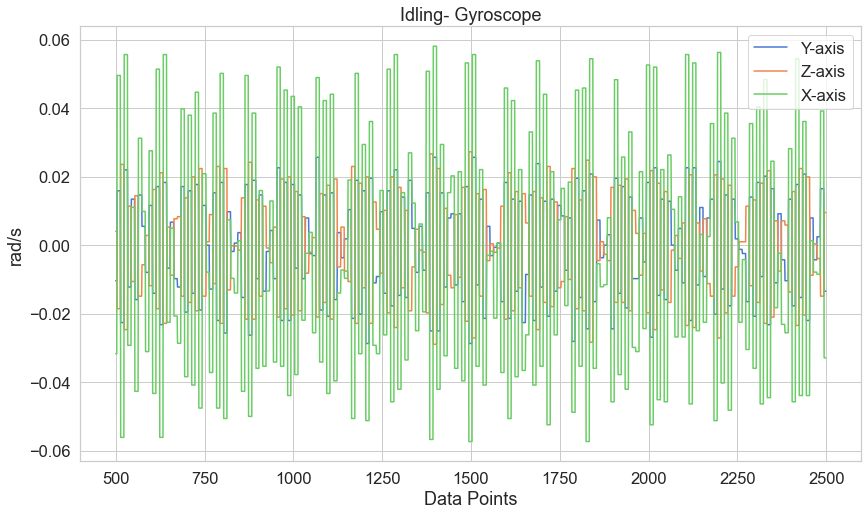

In [23]:
# GYROSCOPE AGGRESSIVE Brake


plt.plot(np.arange(500,TIME_STAMP), data_df.GYRO_Y[data_df['ACTIVITY']=="Idling"][500:TIME_STAMP],  label = 'Y-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.GYRO_Z[data_df['ACTIVITY']=="Idling"][500:TIME_STAMP],  label = 'Z-axis' )
plt.plot(np.arange(500,TIME_STAMP), data_df.GYRO_X[data_df['ACTIVITY']=="Idling"][500:TIME_STAMP],  label = 'X-axis' )
plt.title("Idling- Gyroscope")
plt.xlabel("Data Points")
plt.ylabel("rad/s")
plt.legend()

### Balancing data


In [31]:
left_df = data_df[data_df['ACTIVITY']=='Left'].head(9321).copy()
right_df = data_df[data_df['ACTIVITY']=='Right'].head(9321).copy()
AgroRight_df = data_df[data_df['ACTIVITY']=='Aggressive Right'].head(9321).copy()
AgroLeft_df = data_df[data_df['ACTIVITY']=='Aggressive Left'].head(9321).copy()
Accelerate_df = data_df[data_df['ACTIVITY']=='Accelerate'].head(9321).copy()
AgroAccelerate_df = data_df[data_df['ACTIVITY']=='Aggressive Accelerate'].head(9321).copy()
Brake_df = data_df[data_df['ACTIVITY']=='Brake'].head(9321).copy()
AgroBrake_df = data_df[data_df['ACTIVITY']=='Aggressive Brake'].head(9321).copy()
Idling_df = data_df[data_df['ACTIVITY']=='Idling'].copy()

In [32]:
# combining them all

balanced_df = pd.concat([Brake_df, left_df, right_df, AgroLeft_df, Accelerate_df, AgroRight_df, AgroAccelerate_df, AgroBrake_df
                        , Idling_df], ignore_index=True)
balanced_df

,unit,TIME,ACCEL_X,ACCEL_Y,ACCEL_Z,GYRO_X,GYRO_Y,GYRO_Z,CURRENT_SPEED,ACTIVITY
0,65181,07:20:35,0.603339,10.292973,0.706290,0.007559,0.002673,-0.001222,0.059769,Brake
1,65182,07:20:35,-0.497994,9.399935,-0.701501,0.007559,0.002673,-0.001222,0.059769,Brake
2,65183,07:20:35,-0.047884,10.039187,0.284910,0.007559,0.002673,-0.001222,0.059769,Brake
3,65184,07:20:35,0.356736,9.596260,-0.402226,0.007559,0.002673,-0.001222,0.059769,Brake
4,65185,07:20:35,-0.162806,9.627384,0.253785,-0.020540,0.028329,-0.023213,0.059769,Brake
...,...,...,...,...,...,...,...,...,...,...
83884,128508,10:48:57,0.122104,9.955390,0.090980,0.000076,0.000611,-0.001451,0.000000,Idling
83885,128509,10:48:57,-0.004788,9.608231,-0.574608,-0.000535,0.000000,-0.000840,0.000000,Idling
83886,128510,10:48:57,-0.004788,9.608231,-0.574608,-0.000535,0.000000,-0.000840,0.000000,Idling
83887,128511,10:48:57,0.244209,10.058341,0.414197,-0.000535,0.000000,-0.000840,0.000000,Idling


### Visualizations

<AxesSubplot:title={'center':'Training examples by activity type - Before balancing'}>

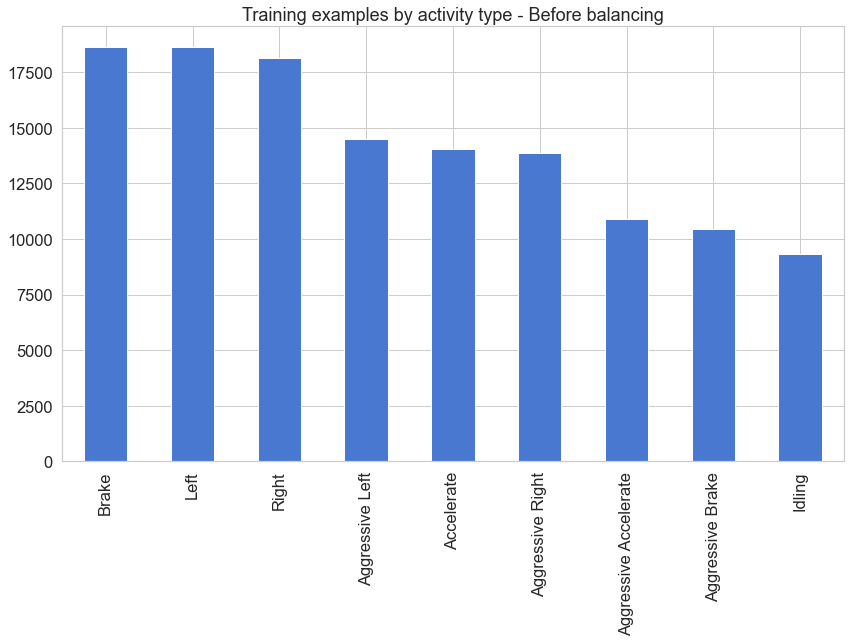

In [33]:
data_df['ACTIVITY'].value_counts().plot(kind = 'bar', title = 'Training examples by activity type - Before balancing')

<AxesSubplot:title={'center':'Training examples by activity type - After balancing'}>

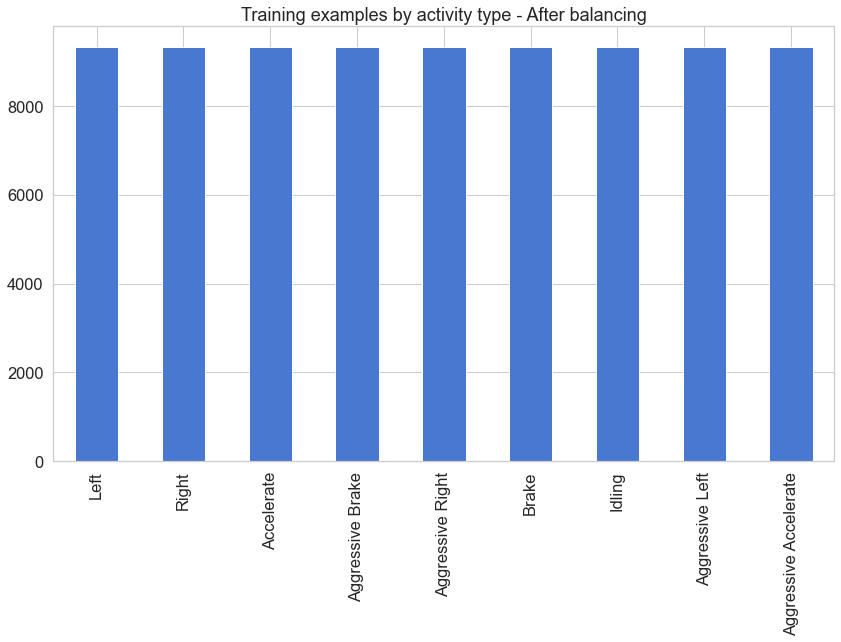

In [34]:
balanced_df['ACTIVITY'].value_counts().plot(kind = 'bar', title = 'Training examples by activity type - After balancing')

### Data preprocessing

In [35]:
# preparing time sequences [samples, timestamps, features], we have 300 as timestamps

N_TIME_STEPS = 300
N_FEATURES = 6
step = 10
segments = []
labels_b4 = []
for i in range(0, len(balanced_df) - N_TIME_STEPS, step):
    xs = balanced_df['ACCEL_X'].values[i: i + N_TIME_STEPS]
    ys = balanced_df['ACCEL_Y'].values[i: i + N_TIME_STEPS]
    zs = balanced_df['ACCEL_Z'].values[i: i + N_TIME_STEPS]
    
    gxs = balanced_df['GYRO_X'].values[i: i + N_TIME_STEPS]
    gys = balanced_df['GYRO_Y'].values[i: i + N_TIME_STEPS]
    gzs = balanced_df['GYRO_Z'].values[i: i + N_TIME_STEPS]
    
    
    label = stats.mode(balanced_df['ACTIVITY'][i: i + N_TIME_STEPS])[0][0]
    segments.append([xs, ys, zs ,gxs, gys, gzs])
    labels_b4.append(label)

In [36]:
np.array(segments).shape

(8359, 6, 300)

In [81]:
print(np.array(labels_b4[0])), print(np.array(labels_b4[917]))

Brake
Brake


(None, None)

In [101]:
print(np.array(labels_b4[918])), print(np.array(labels_b4[1849]))

Left
Left


(None, None)

In [136]:
print(np.array(labels_b4[1850])), print(np.array(labels_b4[2781]))

Right
Right


(None, None)

In [114]:
print(np.array(labels_b4[2782])), print(np.array(labels_b4[3713]))

Aggressive Left
Aggressive Left


(None, None)

In [119]:
print(np.array(labels_b4[3714])), print(np.array(labels_b4[4645]))

Accelerate
Accelerate


(None, None)

In [125]:
print(np.array(labels_b4[4646])), print(np.array(labels_b4[5577]))

Aggressive Right
Aggressive Right


(None, None)

In [126]:
print(np.array(labels_b4[5578])), print(np.array(labels_b4[6509]))

Aggressive Accelerate
Aggressive Accelerate


(None, None)

In [128]:
print(np.array(labels_b4[6510])), print(np.array(labels_b4[7441]))

Aggressive Brake
Aggressive Brake


(None, None)

In [134]:
print(np.array(labels_b4[7442])), print(np.array(labels_b4[8358]))

Idling
Idling


(None, None)

Our training dataset has drastically reduced size after the transformation. Note that we take the most common activity and assign it as a label for the sequence. 

The shape of our tensor looks kinda strange. Let's transform it into sequences of 200 rows, each containing x, y and z. Let's apply a one-hot encoding to our labels, as well:

In [72]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels_b4), dtype = np.float32)

In [73]:
reshaped_segments.shape

(8359, 300, 6)

In [74]:
labels.shape

(8359, 9)

In [84]:
labels[0], labels[917]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32))

In [99]:
labels[918], labels[1849]

(array([0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32))

In [110]:
labels[1850], labels[2781]

(array([0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

In [115]:
labels[2782], labels[3713]

(array([0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32))

In [118]:
labels[3714], labels[4645]

(array([1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

In [123]:
labels[4646], labels[5577]

(array([0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [127]:
labels[5578], labels[6509]

(array([0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

In [131]:
labels[6510], labels[7441]

(array([0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32))

In [135]:
labels[7442], labels[8358]

(array([0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32))

#### ONE HOT ENCODING SCHEME

- [0., 0., 0., 0., 0., 0., 0., 0., 1.] = RIGHT
- [0., 0., 0., 0., 0., 0., 0., 1., 0.] = LEFT
- [0., 0., 0., 0., 0., 0., 1., 0., 0.] = IDLING
- [0., 0., 0., 0., 0., 1., 0., 0., 0.] = BRAKE 
- [0., 0., 0., 0., 1., 0., 0., 0., 0.] = AGGRESSIVE RIGHT
- [0., 0., 0., 1., 0., 0., 0., 0., 0.] = AGGRESSIVE LEFT
- [0., 0., 1., 0., 0., 0., 0., 0., 0.] = AGGRESSIVE BRAKE
- [0., 1., 0., 0., 0., 0., 0., 0., 0.] = AGGRESSIVE ACCELERATE
- [1., 0., 0., 0., 0., 0., 0., 0., 0.] = ACCELERATE








### Split values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
        reshaped_segments, labels, test_size=0.2, random_state=RANDOM_SEED)

In [15]:
len(X_train), len(X_test)

(6687, 1672)

In [16]:
len(y_train), len(y_test)

(6687, 1672)

### Building model

Model has 2 fully connected layers (Dense) and 2 LSTM layers 

In [25]:
N_CLASSES = 9
N_HIDDEN_UNITS = 32

In [26]:
def create_LSTM_model(inputs):
    W = {
        'hidden': tf.Variable(tf.random_normal([N_FEATURES, N_HIDDEN_UNITS])),
        'output': tf.Variable(tf.random_normal([N_HIDDEN_UNITS, N_CLASSES]))
    }
    biases = {
        'hidden': tf.Variable(tf.random_normal([N_HIDDEN_UNITS], mean=1.0)),
        'output': tf.Variable(tf.random_normal([N_CLASSES]))
    }
    
    X = tf.transpose(inputs, [1, 0, 2])
    X = tf.reshape(X, [-1, N_FEATURES])
    hidden = tf.nn.relu(tf.matmul(X, W['hidden']) + biases['hidden'])
    hidden = tf.split(hidden, N_TIME_STEPS, 0)

    # Stack 2 LSTM layers
    lstm_layers = [tf.contrib.rnn.BasicLSTMCell(N_HIDDEN_UNITS, forget_bias=1.0) for _ in range(2)]
    lstm_layers = tf.contrib.rnn.MultiRNNCell(lstm_layers)

    outputs, _ = tf.contrib.rnn.static_rnn(lstm_layers, hidden, dtype=tf.float32)

    # Get output for the last time step
    lstm_last_output = outputs[-1]

    return tf.matmul(lstm_last_output, W['output']) + biases['output']

Creating placeholders for our models:

In [27]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, N_TIME_STEPS, N_FEATURES], name="input")  #name of input
Y = tf.placeholder(tf.float32, [None, N_CLASSES])

we named the input tensors "input"

In [28]:
pred_Y = create_LSTM_model(X)

pred_softmax = tf.nn.softmax(pred_Y, name = "y_")  #output

L2 Regularizers:

In [29]:
L2_LOSS = 0.0015

l2 = L2_LOSS * \
    sum(tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables())

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred_Y, labels = Y)) + l2

In [30]:
LEARNING_RATE = 0.0025

optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(loss)

correct_pred = tf.equal(tf.argmax(pred_softmax, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

### Training

In [31]:
N_EPOCHS = 100
BATCH_SIZE = 64


In [32]:
saver = tf.train.Saver()


history = dict(train_loss=[], 
                     train_acc=[], 
                     test_loss=[], 
                     test_acc=[])


sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

train_count = len(X_train)

for i in range(1, N_EPOCHS + 1):
    for start, end in zip(range(0, train_count, BATCH_SIZE),
                          range(BATCH_SIZE, train_count + 1,BATCH_SIZE)):
        sess.run(optimizer, feed_dict={X: X_train[start:end],
                                       Y: y_train[start:end]})

    _, acc_train, loss_train = sess.run([pred_softmax, accuracy, loss], feed_dict={
                                            X: X_train, Y: y_train})

    _, acc_test, loss_test = sess.run([pred_softmax, accuracy, loss], feed_dict={
                                            X: X_test, Y: y_test})

    history['train_loss'].append(loss_train)
    history['train_acc'].append(acc_train)
    history['test_loss'].append(loss_test)
    history['test_acc'].append(acc_test)

    if i != 1 and i % 10 != 0:
        continue

    print(f'epoch: {i} test accuracy: {acc_test} loss: {loss_test}')
    
predictions, acc_final, loss_final = sess.run([pred_softmax, accuracy, loss], feed_dict={X: X_test, Y: y_test})

print()
print(f'final results: accuracy: {acc_final} loss: {loss_final}')

C:\Anaconda\envs\tf113py36\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


epoch: 1 test accuracy: 0.11303827911615372 loss: 2.584160566329956
epoch: 10 test accuracy: 0.7858851552009583 loss: 0.749151349067688
epoch: 20 test accuracy: 0.9635167717933655 loss: 0.3418266177177429
epoch: 30 test accuracy: 0.9802631735801697 loss: 0.2690688967704773
epoch: 40 test accuracy: 0.9724880456924438 loss: 0.2826504409313202
epoch: 50 test accuracy: 0.9742823243141174 loss: 0.25541603565216064
epoch: 60 test accuracy: 0.9838516712188721 loss: 0.24176742136478424
epoch: 70 test accuracy: 0.9760765433311462 loss: 0.2637385129928589
epoch: 80 test accuracy: 0.9802631735801697 loss: 0.2548058032989502
epoch: 90 test accuracy: 0.9748803973197937 loss: 0.24845241010189056
epoch: 100 test accuracy: 0.9832535982131958 loss: 0.20176757872104645

final results: accuracy: 0.9832535982131958 loss: 0.20176757872104645


saving model to disk:

In [ ]:
pickle.dump(predictions, open("predictions.p", "wb"))
pickle.dump(history, open("history.p", "wb"))
tf.train.write_graph(sess.graph_def, '.', './checkpoint/har.pbtxt')  
saver.save(sess, save_path = "./checkpoint/har.ckpt")
sess.close()

loading it back:

In [ ]:
history = pickle.load(open("history.p", "rb"))
predictions = pickle.load(open("predictions.p", "rb"))

### Evaluation

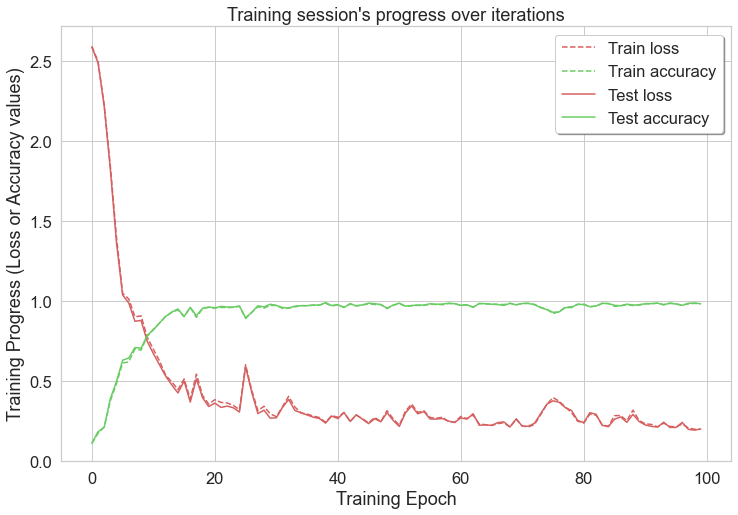

In [33]:
plt.figure(figsize=(12, 8))

plt.plot(np.array(history['train_loss']), "r--", label="Train loss")
plt.plot(np.array(history['train_acc']), "g--", label="Train accuracy")

plt.plot(np.array(history['test_loss']), "r-", label="Test loss")
plt.plot(np.array(history['test_acc']), "g-", label="Test accuracy")

plt.title("Training session's progress over iterations")
plt.legend(loc='upper right', shadow=True)
plt.ylabel('Training Progress (Loss or Accuracy values)')
plt.xlabel('Training Epoch')
plt.ylim(0)

plt.show()

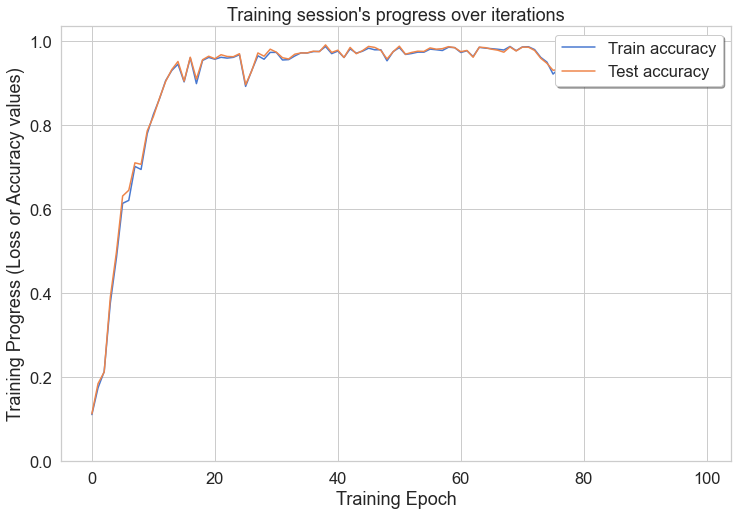

In [40]:
plt.figure(figsize=(12, 8))


plt.plot(np.array(history['train_acc']),  label="Train accuracy")


plt.plot(np.array(history['test_acc']), label="Test accuracy")

plt.title("Training session's progress over iterations")
plt.legend(loc='upper right', shadow=True)
plt.ylabel('Training Progress (Loss or Accuracy values)')
plt.xlabel('Training Epoch')
plt.ylim(0)

plt.show()

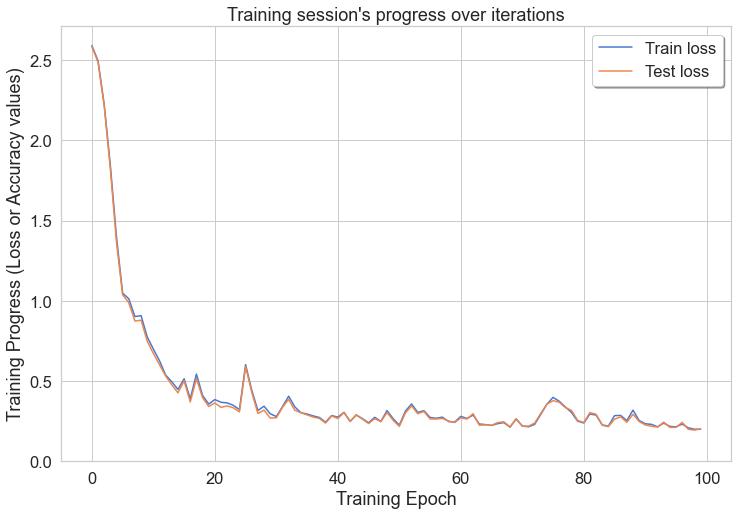

In [39]:
plt.figure(figsize=(12, 8))

plt.plot(np.array(history['train_loss']),  label="Train loss")


plt.plot(np.array(history['test_loss']), label="Test loss")


plt.title("Training session's progress over iterations")
plt.legend(loc='upper right', shadow=True)
plt.ylabel('Training Progress (Loss or Accuracy values)')
plt.xlabel('Training Epoch')
plt.ylim(0)

plt.show()

In [41]:
LABELS = ['Accelerate', 'Aggressive Accelerate', 'Aggressive Brake', 'Aggressive Left', 'Aggressive Right'
          , 'Brake', 'Idling', 'Left', 'Right']

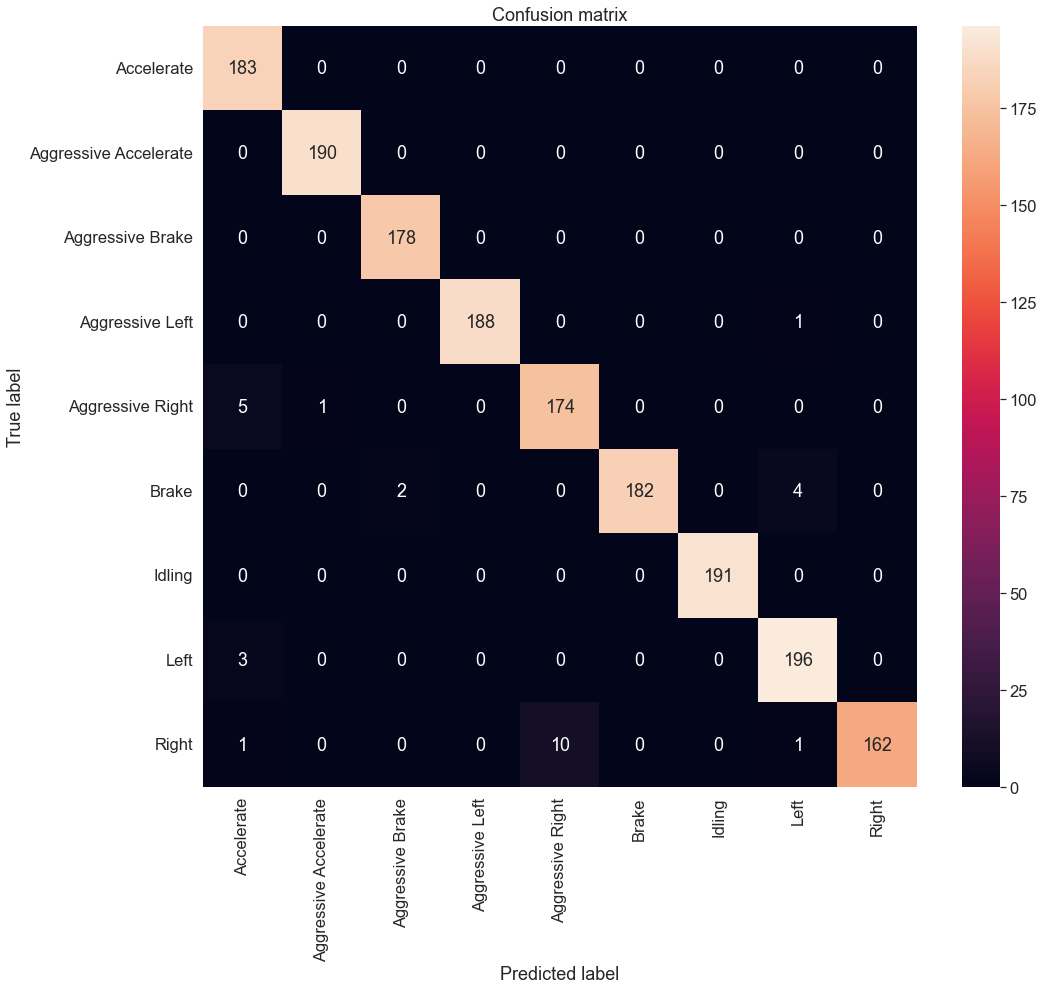

In [42]:
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)

plt.figure(figsize=(16, 14))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

### Exporting the model

In [ ]:
from tensorflow.python.tools import freeze_graph

MODEL_NAME = 'driverprofiler'

input_graph_path = 'checkpoint/' + MODEL_NAME+'.pbtxt'
checkpoint_path = './checkpoint/' +MODEL_NAME+'.ckpt'
restore_op_name = "save/restore_all"
filename_tensor_name = "save/Const:0"
output_frozen_graph_name = 'frozen_'+MODEL_NAME+'.pb'

freeze_graph.freeze_graph(input_graph_path, input_saver="",
                          input_binary=False, input_checkpoint=checkpoint_path, 
                          output_node_names="y_", restore_op_name="save/restore_all",
                          filename_tensor_name="save/Const:0", 
                          output_graph=output_frozen_graph_name, clear_devices=True, initializer_nodes="")